## Learning objectives

read .parquet files into pandas DataFrames with pd.read_parquet

convert datetime columns into separate year, month, and day components

write reusable functions to calculate average or maximum values by grouping (e.g., average temperature by station and month-year pair)

build matplotlib visualizations (line plots, bar plots, box plots) programmatically through functions

apply functions to compare trends across different stations and years

encapsulate exploratory data analysis (EDA) tasks into user-defined functions for reproducibility

explore weather datasets and generate systematic plots for additional insights (wind speed, pressure, soil temperature, etc.)

In [120]:
import pandas as pd

In [119]:
myDF = pd.read_parquet('/anvil/projects/tdm/data/whin/weather.parquet')

## Question 1

In [121]:
pd.set_option('display.max_columns', None)

In [122]:
#Part a
myDF['observation_time'] = pd.to_datetime(myDF['observation_time'])

In [123]:
#Part b
myDF['year'] = myDF['observation_time'].dt.year

In [124]:
myDF['month'] = myDF['observation_time'].dt.month

In [125]:
myDF['day'] = myDF['observation_time'].dt.day

In [41]:
myDF.head()

,station_id,latitude,longitude,name,observation_time,temperature,temperature_high,temperature_low,humidity,solar_radiation,solar_radiation_high,rain,rain_inches_last_hour,wind_speed_mph,wind_direction_degrees,wind_gust_speed_mph,wind_gust_direction_degrees,pressure,soil_temp_1,soil_temp_2,soil_temp_3,soil_temp_4,soil_moist_1,soil_moist_2,soil_moist_3,soil_moist_4,year,month,day
0,1,40.93894,-86.47418,WHIN001-PULA001,2019-07-10 04:00:00+00:00,70.0,71.0,70.0,83.0,NaN,NaN,0.0,0.0,0.0,NaN,3.0,247.5,30.05,77.0,78.0,76.0,74.0,24.0,24.0,10.0,9.0,2019,7,10
1,1,40.93894,-86.47418,WHIN001-PULA001,2019-07-10 04:15:00+00:00,69.0,70.0,69.0,84.0,NaN,NaN,0.0,0.0,1.0,247.5,3.0,247.5,30.04,76.0,78.0,76.0,74.0,24.0,25.0,10.0,9.0,2019,7,10
2,1,40.93894,-86.47418,WHIN001-PULA001,2019-07-11 04:00:00+00:00,76.0,77.0,76.0,76.0,NaN,NaN,0.0,0.0,2.0,202.5,4.0,202.5,29.89,80.0,80.0,78.0,75.0,31.0,30.0,12.0,10.0,2019,7,11
3,1,40.93894,-86.47418,WHIN001-PULA001,2019-07-11 04:15:00+00:00,76.0,76.0,76.0,77.0,NaN,NaN,0.0,0.0,2.0,202.5,4.0,202.5,29.88,80.0,80.0,78.0,75.0,31.0,31.0,12.0,10.0,2019,7,11
4,1,40.93894,-86.47418,WHIN001-PULA001,2019-07-11 04:30:00+00:00,76.0,76.0,76.0,77.0,NaN,NaN,0.0,0.0,2.0,225.0,4.0,202.5,29.88,80.0,80.0,78.0,75.0,32.0,31.0,12.0,10.0,2019,7,11


In [126]:
#Part c
my_station_id = 1

In [127]:
myDF[myDF['station_id'] == my_station_id].groupby(['year','month'])['temperature'].mean()

year  month
2019  7         1.699000
      8        58.450756
      9        68.906912
      10       53.950605
      11       35.828114
      12       34.838319
2020  1        32.782521
      2        30.199713
      3        42.102590
      4        48.237153
      5        60.180444
      6        73.109375
      7        76.111970
      8        71.325480
      9        64.010424
      10       51.814454
      11       46.175652
      12       32.706989
2021  1        29.468571
      2        21.116115
      3        44.176194
      4        50.613834
      5        59.466555
      6        73.381730
      7        72.553822
Name: temperature, dtype: float64

In [128]:
my_station_id = 3

In [129]:
myDF[myDF['station_id'] == my_station_id].groupby(['year','month'])['temperature'].mean()

year  month
2019  7        75.180500
      8        71.561008
      9        69.971865
      10       53.778675
      11       35.788943
      12       35.198925
2020  1        32.490084
      2        30.007902
      3        42.293999
      4        48.614236
      5        60.453293
      6        73.259118
      7        75.462366
      8        71.006720
      9        64.216319
      10       51.790659
      11       46.533380
      12       32.646723
2021  1        29.356183
      2        20.426126
      3        44.336584
      4        51.529861
      5        60.045042
      6        73.576042
      7        72.650096
Name: temperature, dtype: float64

In [130]:
my_station_id = 100

In [131]:
myDF[myDF['station_id'] == my_station_id].groupby(['year','month'])['temperature'].mean()

year  month
2019  7        74.900500
      8        71.227487
      9        69.555903
      10       53.915995
      11       36.367524
      12       35.420699
2020  1        33.314516
      2        31.403736
      3        43.959677
      4        49.469608
      5        60.661849
      6        73.210069
      7        75.003024
      8        70.602430
      9        63.836370
      10       52.138384
      11       46.404381
      12       32.914987
2021  1        30.265457
      2        22.330852
      3        45.064516
      4        52.412500
      5        60.233434
      6        72.934238
      7        72.640159
Name: temperature, dtype: float64

In [132]:
#Part d
def get_avg_temp(my_station_id: int) -> pd.DataFrame:
    """
    This function takes the station_ID and then gives you the the averge tempertature year and month 
    Args:
    my_station_id (int): The station ID for which to calculate average temperatures.
    Returns:
    myDF(pd.DataFrame: This has the data for the said years and Station ID 
    """
    myDF['observation_time'] = pd.to_datetime(myDF['observation_time'])
    myDF['year'] = myDF['observation_time'].dt.year
    myDF['month'] = myDF['observation_time'].dt.month
    my_stationID = myDF[myDF['station_id'] == my_station_id]
    avg_temp = my_stationID.groupby(['year','month'])['temperature'].mean()
    return avg_temp  


In [134]:
get_avg_temp(1)

year  month
2019  7         1.699000
      8        58.450756
      9        68.906912
      10       53.950605
      11       35.828114
      12       34.838319
2020  1        32.782521
      2        30.199713
      3        42.102590
      4        48.237153
      5        60.180444
      6        73.109375
      7        76.111970
      8        71.325480
      9        64.010424
      10       51.814454
      11       46.175652
      12       32.706989
2021  1        29.468571
      2        21.116115
      3        44.176194
      4        50.613834
      5        59.466555
      6        73.381730
      7        72.553822
Name: temperature, dtype: float64

Markdown notes and sentences and analysis written here.

## Question 2

In [267]:
import matplotlib.pyplot as plt

In [159]:
my_results = get_avg_temp(1)

In [156]:
my_results.unstack(0)

year
month


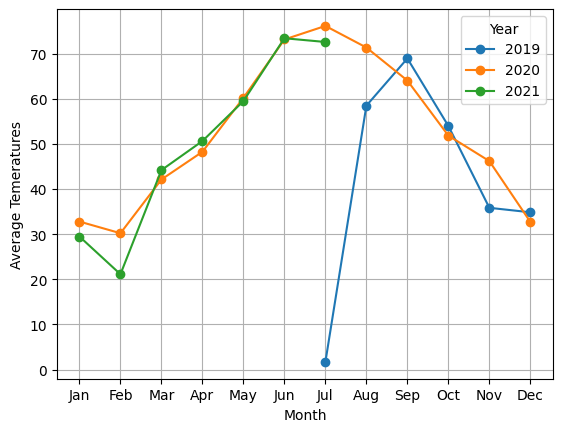

In [160]:
#Part a
my_results.unstack(0).plot(kind = 'line', marker = 'o')
plt.xlabel('Month')
plt.ylabel('Average Temeratures')
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] ) 
plt.legend(title = 'Year')
plt.grid(True)
plt.show()

In [232]:
#Part b

def get_line_plot(my_station_id: int) -> pd.DataFrame:
    """
    This function takes the station_ID and then gives you the the averge tempertature year and month and shows you a graph 
    Args:
    my_station_id (int): The station ID for which to calculate average temperatures.
    Returns:
    myDF(pd.DataFrame: This has the data for the said years and Station ID 
    """
    myDF['observation_time'] = pd.to_datetime(myDF['observation_time'])
    myDF['year'] = myDF['observation_time'].dt.year
    myDF['month'] = myDF['observation_time'].dt.month
    filtered_data = myDF[myDF['station_id'] == my_station_id]
    avg_temp = filtered_data.groupby(['year', 'month'])['temperature'].mean().reset_index()
    
    avg_temp_pivot = avg_temp.pivot(index='month', columns='year', values='temperature')
    avg_temp_pivot.plot(kind='line', marker='o')
    plt.xlabel('Month')
    plt.ylabel('Average Temperatures')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Year')
    plt.grid(True)
    plt.show()
    

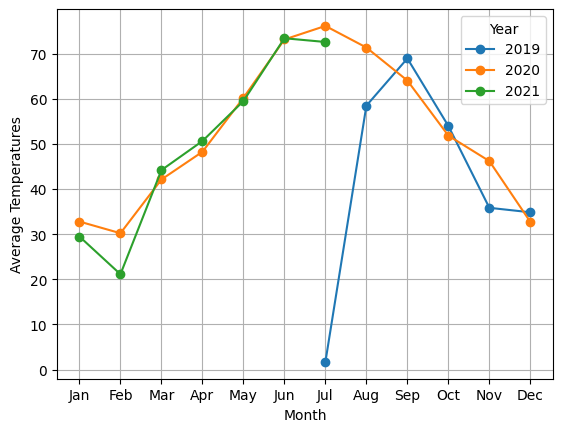

In [233]:
get_line_plot(1)

Markdown notes and sentences and analysis written here.

## Question 3

In [170]:
#Part a
def get_max_temp(my_station_id: int) -> pd.DataFrame:
    """
    This function takes the station_ID and then gives you the the max tempertature year and month 
    Args:
    my_station_id (int): The station ID for which to calculate max temperatures.
    Returns:
    myDF(pd.DataFrame: This has the data for the said years and Station ID 
    """
    myDF['observation_time'] = pd.to_datetime(myDF['observation_time'])
    myDF['year'] = myDF['observation_time'].dt.year
    myDF['month'] = myDF['observation_time'].dt.month
    my_stationID = myDF[myDF['station_id'] == my_station_id]
    avg_temp = my_stationID.groupby(['year','month'])['temperature'].max()
    return avg_temp  


In [201]:
get_max_temp(2)

year  month
2019  7        94.0
      8        90.0
      9        92.0
      10       91.0
      11       57.0
      12       63.0
2020  1        59.0
      2        59.0
      3        67.0
      4        79.0
      5        89.0
      6        94.0
      7        92.0
      8        91.0
      9        86.0
      10       83.0
      11       78.0
      12       59.0
2021  1        46.0
      2        60.0
      3        72.0
      4        84.0
      5        89.0
      6        95.0
      7        88.0
Name: temperature, dtype: float64

In [173]:
my_results_two = get_max_temp(1)

In [224]:
def get_max_temp(my_station_id: int) -> pd.DataFrame:
    """
    This function takes the station_ID and then gives you the the max tempertature year and month and makes it a bar graph  
    Args:
    my_station_id (int): The station ID for which to calculate max temperatures.
    Returns:
    myDF(pd.DataFrame: This has the data for the said years and Station ID 
    """
    myDF['observation_time'] = pd.to_datetime(myDF['observation_time'])
    myDF['year'] = myDF['observation_time'].dt.year
    myDF['month'] = myDF['observation_time'].dt.month
    filtered_data = myDF[myDF['station_id'] == my_station_id]
    max_temp = filtered_data.groupby(['year', 'month'])['temperature'].max().reset_index()
    
    max_temp_pivot = avg_temp.pivot(index='month', columns='year', values='temperature')
    max_temp_pivot.plot(kind='bar')
    plt.xlabel('Month')
    plt.ylabel('Average Temperatures')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Year')
    plt.grid(True)
    plt.show()

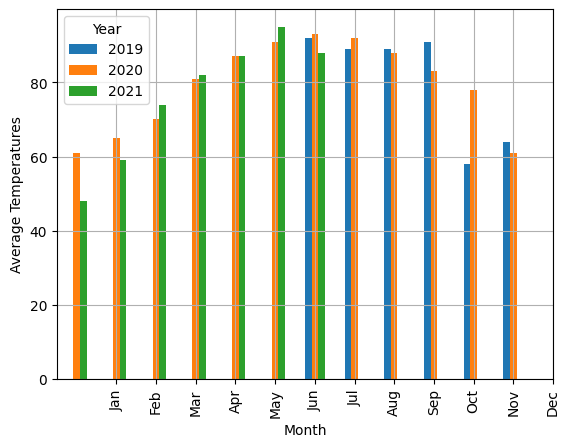

In [227]:
get_max_temp(1)

Markdown notes and sentences and analysis written here.

## Question 4

In [237]:
my_station_id = 100
myyear=2020

In [240]:
my_results = myDF[(myDF['station_id'] == my_station_id) & (myDF['year'] == myyear)]

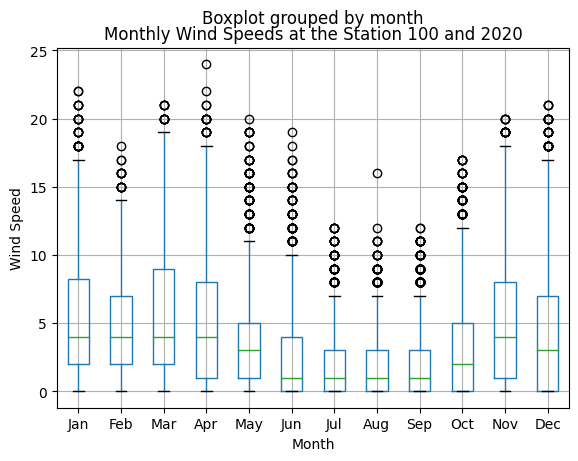

In [245]:
#Part a
my_results.boxplot(column = 'wind_speed_mph', by = 'month')
plt.title(f'Monthly Wind Speeds at the Station {my_station_id} and {myyear}')
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] ) 
plt.grid(True)
plt.show()

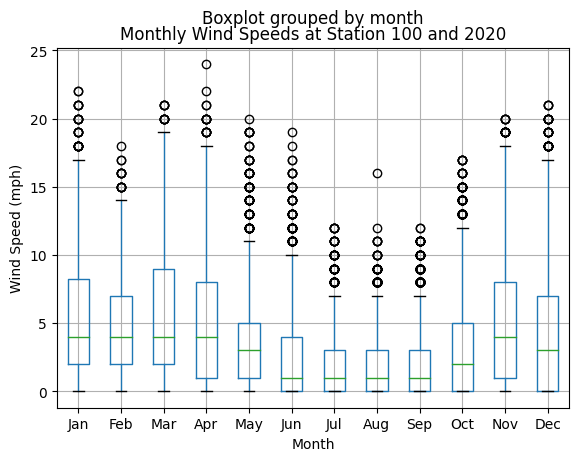

In [254]:
#Part b
def wind_speed_box_plot(myDF: pd.DataFrame, my_station_id: int, my_year: int):
    """
    Create a box plot showing month-by-month wind speeds for a specific year and station ID.

   Args:
    my_station_id (int): The station ID for which to calculate the wind speed 
    Returns:
    myDF(pd.DataFrame: This has the data for the said years and Station ID 
    """
my_results = myDF[(myDF['station_id'] == my_station_id) & (myDF['year'] == myyear)]
my_results.boxplot(column='wind_speed_mph', by='month')

plt.title(f'Monthly Wind Speeds at Station {my_station_id} and {myyear}')
plt.xlabel('Month')
plt.ylabel('Wind Speed (mph)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)


Markdown notes and sentences and analysis written here.

## Question 5

In [262]:
def get_avg_hum(my_station_id: int) -> pd.DataFrame:
    """
    This function takes the station_ID and then gives you the the averge tempertature year and month 
    Args:
    my_station_id (int): The station ID for which to calculate average temperatures.
    Returns:
    myDF(pd.DataFrame: This has the data for the said years and Station ID 
    """
    myDF['observation_time'] = pd.to_datetime(myDF['observation_time'])
    myDF['month'] = myDF['observation_time'].dt.month
    my_stationID = myDF[myDF['station_id'] == my_station_id]
    avg_temp = my_stationID.groupby(['month'])['humidity'].max()
    return avg_temp  

In [264]:
get_avg_hum(1)

month
1      98.0
2      97.0
3      98.0
4      97.0
5      97.0
6      98.0
7     100.0
8     100.0
9      99.0
10     98.0
11     98.0
12     97.0
Name: humidity, dtype: float64

In [268]:
hum_result = get_avg_hum(1)

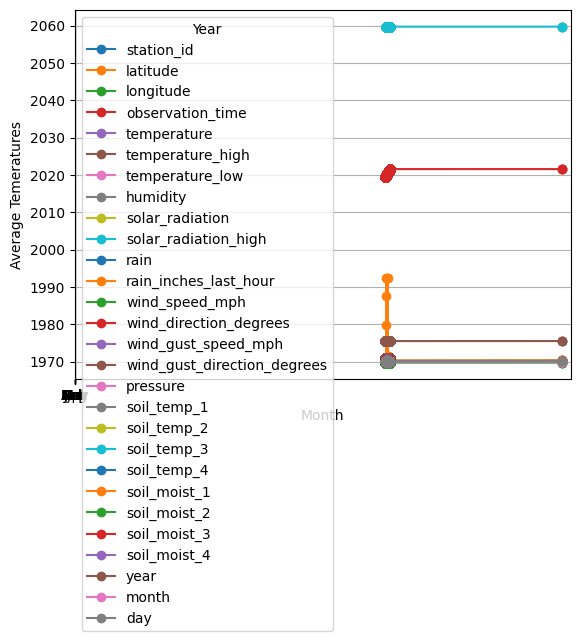

Exception ignored in: <module 'threading' from '/usr/local/lib/python3.11/threading.py'>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/threading.py", line 1553, in _shutdown
  File "/usr/local/lib/python3.11/concurrent/futures/thread.py", line 27, in _python_exit
  File "/usr/local/lib/python3.11/weakref.py", line 462, in items
  File "/usr/local/lib/python3.11/_weakrefset.py", line 21, in __enter__
  File "/usr/local/lib/python3.11/site-packages/rpy2/rinterface.py", line 107, in _sigint_handler
KeyboardInterrupt: 


In [276]:
#Part b
hum_result = myDF[(myDF['station_id'] == my_station_id)]
hum_result.plot(kind = 'line', marker = 'o')
plt.xlabel('Month')
plt.ylabel('Average Temeratures')
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] ) 
plt.legend(title = 'Year')
plt.grid(True)
plt.show()

In [1]:
def get_avg_hum(my_station_id: int) -> pd.DataFrame:
    """
    This function takes the station_ID and then gives you the the averge tempertature year and month 
    Args:
    my_station_id (int): The station ID for which to calculate average temperatures.
    Returns:
    myDF(pd.DataFrame: This has the data for the said years and Station ID 
    """
    myDF['observation_time'] = pd.to_datetime(myDF['observation_time'])
    myDF['month'] = myDF['observation_time'].dt.month
    my_stationID = myDF[myDF['station_id'] == my_station_id]
    avg_temp = my_stationID.groupby(['month'])['humidity'].max()
    return avg_temp  
hum_result = myDF[(myDF['station_id'] == my_station_id)]
hum_result.plot(kind = 'line', marker = 'o')
plt.xlabel('Month')
plt.ylabel('Average Temeratures')
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] ) 
plt.legend(title = 'Year')
plt.grid(True)
plt.show()

NameError: name 'pd' is not defined

Markdown notes and sentences and analysis written here.